<a href="https://colab.research.google.com/github/rahule-1999/M.Sc-Project/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
! pip install corner==2.2.2

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import corner

In [6]:
def signal_fn(t,A,w,phi):
  return A*np.sin((w*t)+phi)

def noise_fn(std,n):
  return np.random.normal(0,std,n)

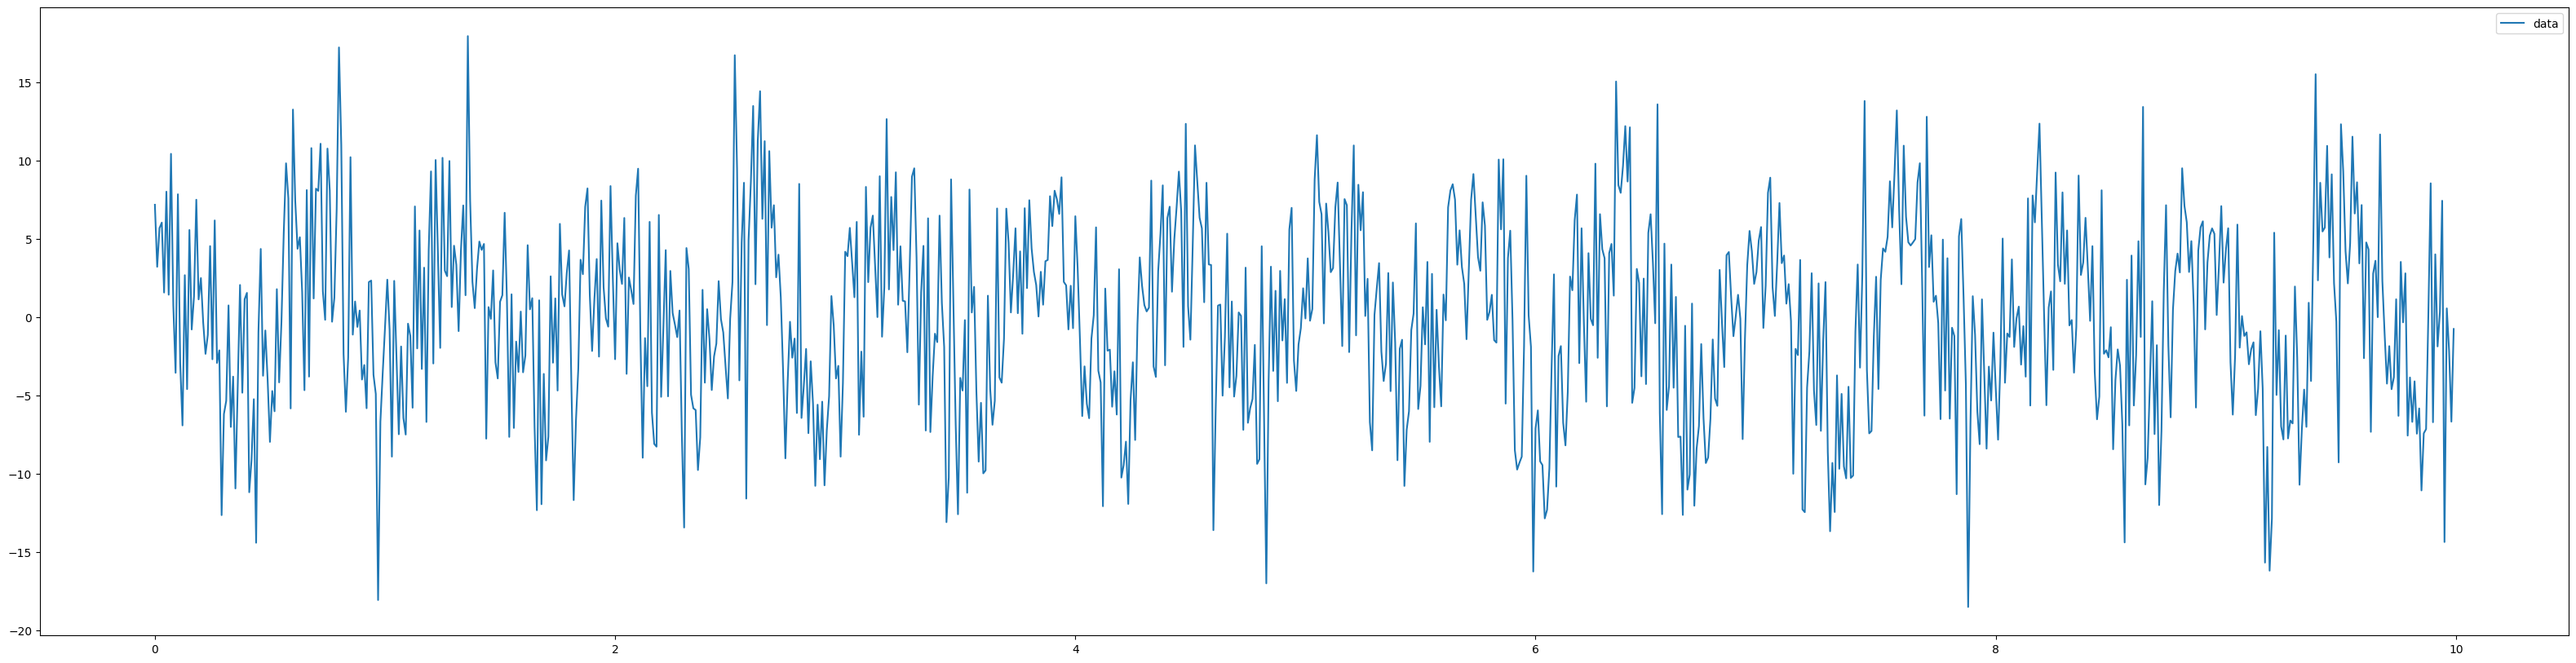

In [7]:
t = np.arange(0,10,0.01)

true_A = 5
true_w = 10
true_phi = np.pi/4
std = 5

sig = signal_fn(t,true_A,true_w,true_phi)
noise = noise_fn(std,len(t))
data = sig + noise

plt.figure(figsize=(40, 10))
#plt.plot(t,sig,label='signal')
plt.plot(t,data,label='data')
#plt.scatter(t,noise,label='noise')
plt.legend(loc='best')

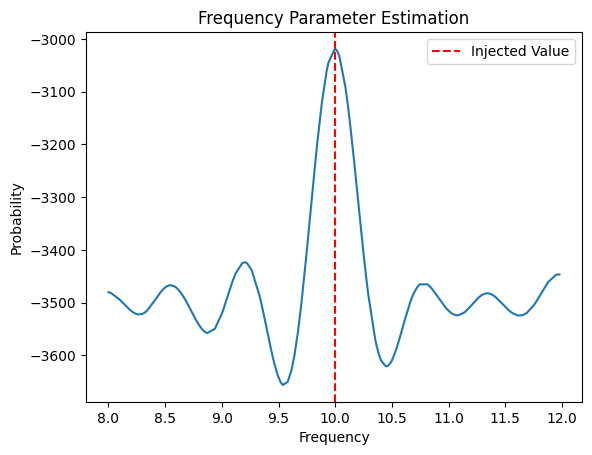

In [8]:
def ln_likelihood_w(t,true_A,w,true_phi,std,data):
  signal_data = signal_fn(t,true_A,w,true_phi)
  ln_likes = -0.5 * ((data - signal_data)**2 / std**2 + np.log(2*np.pi*std**2))
  return sum(ln_likes)


def get_prior_w(w_range,n):
  return np.random.uniform(w_range[0],w_range[1],n)

w_range = [8,12]
w_iter = get_prior_w(w_range,200)


w_and_likes = []

for i in w_iter:
  w_and_likes.append([i,ln_likelihood_w(t,true_A,i,true_phi,std,data)])

#Just for plotting
sorted_w_and_likes = sorted(w_and_likes,key=lambda x: x[0])
x=[x[0] for x in sorted_w_and_likes]
y=[x[1] for x in sorted_w_and_likes]
plt.plot(x,y)
plt.xlabel('Frequency')
plt.ylabel('Probability')
plt.axvline(x=10,color='red',label='Injected Value', linestyle='dashed')
plt.legend(loc='best')
plt.title('Frequency Parameter Estimation')

sorted_w_and_likes = sorted(w_and_likes,key=lambda x: x[1])
#sorted_w_and_likes

In [10]:
N_iter = 100
i=0

w_Nsample=[]

while(i<N_iter):
  w_sample = get_prior_w(w_range,1)
  ln_likes_sample = ln_likelihood_w(t,true_A,w_sample,true_phi,std,data)

  if ln_likes_sample > sorted_w_and_likes[0][1]:
    w_Nsample.append(sorted_w_and_likes.pop(0))
    sorted_w_and_likes.append([w_sample[0],ln_likes_sample])
    sorted_w_and_likes = sorted(sorted_w_and_likes,key=lambda x: x[1])

  i+=1

w_Nsample = sorted(w_Nsample,key=lambda x: x[1])
#w_Nsample
#x=[x[0] for x in w_Nsample]
#x = list(np.around(np.array(x),3))
#plt.hist(x,bins=100)
# y=[x[1] for x in w_Nsample]
# plt.plot(x,y)

w_Nsample[-1]

[11.547094872207836, -3517.3895819932686]

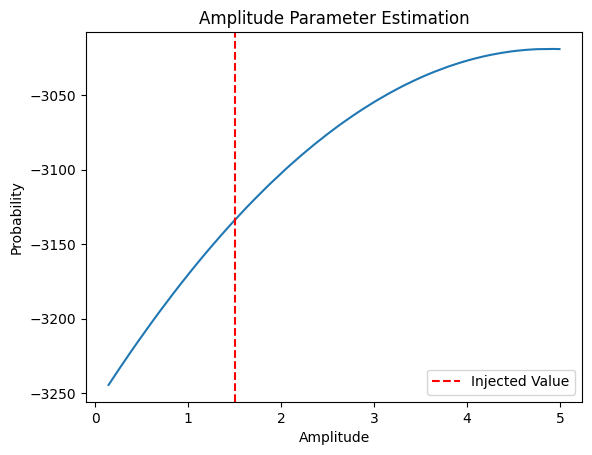

In [11]:
def ln_likelihood_A(t,A,true_w,true_phi,std,data):
  signal_data = signal_fn(t,A,true_w,true_phi)
  ln_likes = -0.5 * ((data - signal_data)**2 / std**2 + np.log(2*np.pi*std**2))
  return sum(ln_likes)


def get_prior_A(A_range,n):
  return np.random.uniform(A_range[0],A_range[1],n)

A_range = [0.1,5]
A_iter = get_prior_A(A_range,200)


A_and_likes = []

for i in A_iter:
  A_and_likes.append([i,ln_likelihood_A(t,i,true_w,true_phi,std,data)])

sorted_A_and_likes = sorted(A_and_likes,key=lambda x: x[0])
x=[x[0] for x in sorted_A_and_likes]
y=[x[1] for x in sorted_A_and_likes]
plt.plot(x,y)
plt.xlabel('Amplitude')
plt.ylabel('Probability')
plt.axvline(x=1.5,color='red',label='Injected Value', linestyle='dashed')
plt.legend(loc='best')
plt.title('Amplitude Parameter Estimation')


sorted_A_and_likes = sorted(A_and_likes,key=lambda x: x[1])
#sorted_w_and_likes

In [12]:
N_iter = 100
i=0

A_Nsample=[]

while(i<N_iter):
  A_sample = get_prior_A(A_range,1)
  ln_likes_sample = ln_likelihood_A(t,A_sample,true_w,true_phi,std,data)

  if ln_likes_sample > sorted_A_and_likes[0][1]:
    A_Nsample.append(sorted_A_and_likes.pop(0))
    sorted_A_and_likes.append([A_sample[0],ln_likes_sample])
    sorted_A_and_likes = sorted(sorted_A_and_likes,key=lambda x: x[1])

  i+=1

A_Nsample = sorted(A_Nsample,key=lambda x: x[1])
#w_Nsample
A_Nsample[-1]
#x = list(np.around(np.array(x),3))
#plt.hist(x,bins=100)
# y=[x[1] for x in w_Nsample]
# plt.plot(x,y)

[1.7348610309832257, -3118.553290603305]

In [13]:
def ln_likelihood_A_and_w(t,A,w,true_phi,std,data):
  signal_data = signal_fn(t,A,w,true_phi)
  ln_likes = -0.5 * ((data - signal_data)**2 / std**2 + np.log(2*np.pi*std**2))
  return sum(ln_likes)


def get_prior_A(A_range,n):
  return np.random.uniform(A_range[0],A_range[1],n)

A_range = [0,10]
A_iter = get_prior_A(A_range,100)

def get_prior_w(w_range,n):
  return np.random.uniform(w_range[0],w_range[1],n)

w_range = [8,12]
w_iter = get_prior_w(w_range,100)

A_and_w_likes = []

for i in range(len(A_iter)):
  A_and_w_likes.append([A_iter[i],w_iter[i],ln_likelihood_A(t,A_iter[i],w_iter[i],true_phi,std,data)])

sorted_A_and_w_likes = sorted(A_and_w_likes,key=lambda x: x[2])
sorted_A_and_w_likes

# x=[x[0] for x in sorted_A_and_w_likes]
# y=[x[1] for x in sorted_A_and_w_likes]
# plt.plot(x,y)
# plt.xlabel('Amplitude')
# plt.ylabel('Probability')
# plt.axvline(x=1.5,color='red',label='Injected Value', linestyle='dashed')
# plt.legend(loc='best')
# plt.title('Amplitude Parameter Estimation')
#sorted_A_and_likes = sorted(A_and_likes,key=lambda x: x[1])
#sorted_w_and_likes

[[9.733393514496289, 9.485318429027714, -4449.706308151443],
 [9.198839235790313, 10.426850481686703, -4307.031974818055],
 [9.956478800024941, 11.512271500543541, -4258.035550949476],
 [9.763674931804161, 8.204443742683788, -4227.811256545178],
 [9.490134773864273, 11.591191581099983, -4187.211853839379],
 [9.717128017574973, 11.891521324427586, -4104.202941916926],
 [9.270632921775132, 8.077384994270302, -4087.199716154254],
 [9.013090418722852, 8.197543522948362, -4083.2361876466152],
 [8.840609466140696, 11.605430612729826, -4067.607774496944],
 [8.159927502385955, 10.365080856354453, -4044.2557367090308],
 [8.693677714387533, 11.142947910065978, -4033.868070336329],
 [9.230115641369492, 10.763588792691156, -4028.597755411734],
 [7.9522839885636865, 10.539140312557262, -4019.646362685879],
 [8.69776255992701, 8.16838652987408, -4016.7252554156516],
 [8.687979567440655, 11.408115137790443, -3980.288709409449],
 [6.639587892974985, 9.567392690670518, -3894.638762239987],
 [7.44361732

In [14]:
A_and_w_Nsample=[]

In [20]:
N_iter = 400000
i=0

while(i<N_iter):
  A_sample = get_prior_A(A_range,1)
  w_sample = get_prior_w(w_range,1)
  ln_likes_sample = ln_likelihood_A(t,A_sample,w_sample,true_phi,std,data)

  if ln_likes_sample > sorted_A_and_w_likes[0][2]:
    A_and_w_Nsample.append(sorted_A_and_w_likes.pop(0))
    sorted_A_and_w_likes.append([A_sample[0],w_sample[0],ln_likes_sample])
    sorted_A_and_w_likes = sorted(sorted_A_and_w_likes,key=lambda x: x[2])

  i+=1

A_and_w_Nsample = sorted(A_and_w_Nsample,key=lambda x: x[2])
#w_Nsample
#A_and_w_Nsample
#x = list(np.around(np.array(x),3))
#plt.hist(x,bins=100)



Text(0.5, 1.0, 'Amplitude Parameter Estimation')

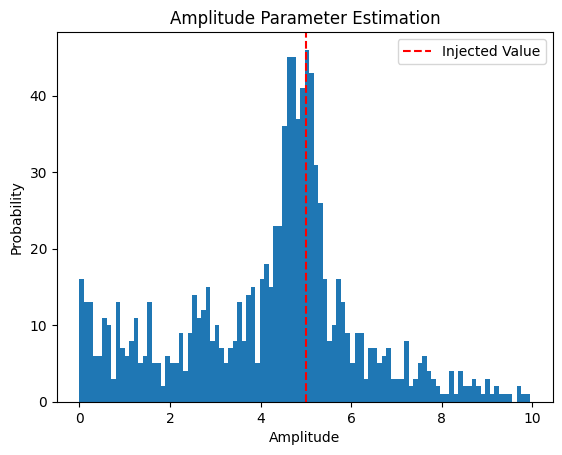

In [21]:
y1=[x[0] for x in A_and_w_Nsample]
plt.hist(y1,bins=100)
plt.xlabel('Amplitude')
plt.ylabel('Probability')
plt.axvline(x=5,color='red',label='Injected Value', linestyle='dashed')
plt.legend(loc='best')
plt.title('Amplitude Parameter Estimation')

Text(0.5, 1.0, 'Frequency Parameter Estimation')

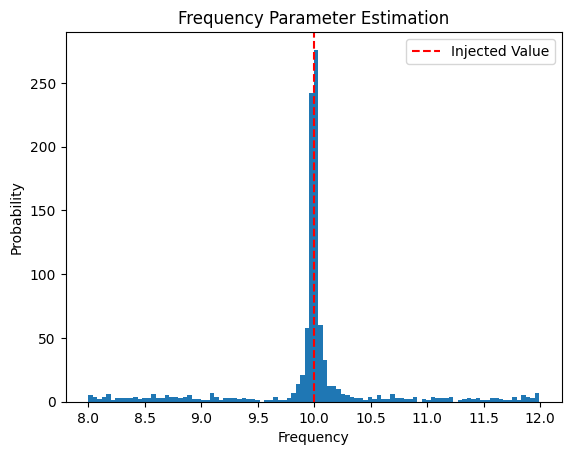

In [22]:
y2=[x[1] for x in A_and_w_Nsample]
plt.hist(y2,bins=100)
plt.xlabel('Frequency')
plt.ylabel('Probability')
plt.axvline(x=10,color='red',label='Injected Value', linestyle='dashed')
plt.legend(loc='best')
plt.title('Frequency Parameter Estimation')

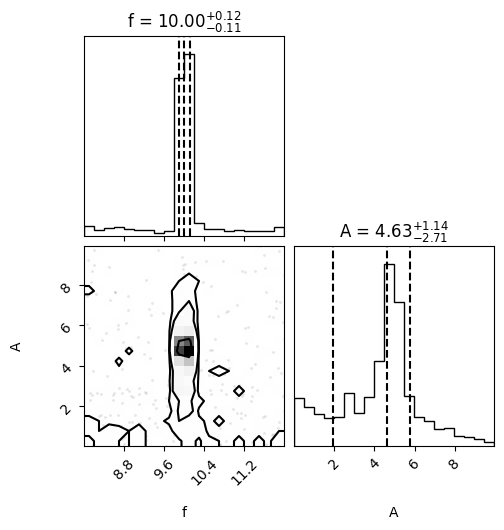

In [25]:
samples = np.array([y2, y1]).T
fig = corner.corner(samples, bins=20, labels=["f", "A"], show_titles=True, quantiles=[0.16, 0.5, 0.84])